# EP2420 - Project 1

## Task 1 - Data Exploration

In [53]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [54]:
# Little function to show only 3 significant numbers.
def round_3(value):
    return f"{value:.3g}"  

### Data import and first analysis

In [55]:
X = pd.read_csv("data/X.csv")
Y = pd.read_csv("data/Y.csv")
X.head()

,TimeStamp,runq-sz,%%memused,proc/s,cswch/s,all_%%usr,ldavg-1,totsck,pgfree/s,plist-sz,file-nr,idel/s,tps
0,1409585052,91,17.30,0.0,75865.0,97.96,122.77,557,80335.0,1019,2976,24.0,11.0
1,1409585053,86,17.31,0.0,74651.0,98.29,122.77,556,74681.0,1019,2976,23.0,0.0
2,1409585054,89,17.32,0.0,78790.0,98.00,122.77,556,78166.0,1019,2976,23.0,0.0
3,1409585055,88,17.33,0.0,75077.0,97.75,122.77,555,74256.0,1019,2976,21.0,0.0
4,1409585056,96,17.32,10.0,72717.0,97.79,122.77,553,84232.0,1011,2976,67.0,2.0


In [56]:
Y = Y.drop("TimeStamp", axis=1)
Y.head()

,DispFrames
0,13.00
1,13.00
2,13.82
3,16.23
4,15.95


Let's mix the features and output datafiles together !

In [57]:
df = X
df["Y"] = Y
df.head()

,TimeStamp,runq-sz,%%memused,proc/s,cswch/s,all_%%usr,ldavg-1,totsck,pgfree/s,plist-sz,file-nr,idel/s,tps,Y
0,1409585052,91,17.30,0.0,75865.0,97.96,122.77,557,80335.0,1019,2976,24.0,11.0,13.00
1,1409585053,86,17.31,0.0,74651.0,98.29,122.77,556,74681.0,1019,2976,23.0,0.0,13.00
2,1409585054,89,17.32,0.0,78790.0,98.00,122.77,556,78166.0,1019,2976,23.0,0.0,13.82
3,1409585055,88,17.33,0.0,75077.0,97.75,122.77,555,74256.0,1019,2976,21.0,0.0,16.23
4,1409585056,96,17.32,10.0,72717.0,97.79,122.77,553,84232.0,1011,2976,67.0,2.0,15.95


Are there duplicates ? Let's remove them if it is the case.

In [58]:
df.drop_duplicates().shape

(3600, 14)

In [59]:
df.shape

(3600, 14)

There are no duplicates !

### Question 1

Let's compute the statistics for each feature of X and target of Y.

In [60]:
percentiles = [0.25, 0.5, 0.9]
description = df.describe(include="all", percentiles= percentiles)
    
description= description.applymap(round_3)
description.drop("count")
description.drop("TimeStamp",axis=1)

,runq-sz,%%memused,proc/s,cswch/s,all_%%usr,ldavg-1,totsck,pgfree/s,plist-sz,file-nr,idel/s,tps,Y
count,3.6e+03,3.6e+03,3.6e+03,3.6e+03,3.6e+03,3.6e+03,3.6e+03,3.6e+03,3.6e+03,3.6e+03,3.6e+03,3.6e+03,3.6e+03
mean,52.7,26.2,6.18,4.31e+04,73.1,60.4,455,7.39e+04,802,2.64e+03,45.6,6.25,20.3
std,47.4,6.25,9.06,2.47e+04,27.7,50.4,181,2.87e+04,346,197,256,12.7,4.99
min,3,15,0,8.38e+03,17.5,4.6,269,1.67e+04,452,2.35e+03,1,0,0
25%,11,22.9,0,1.88e+04,45,13.4,311,5.61e+04,525,2.5e+03,11,0,14.8
50%,33,25.8,0,3.88e+04,93.5,44,366,7.15e+04,632,2.59e+03,21,0,23.4
90%,126,35.9,19,7.33e+04,98.1,139,753,1.13e+05,1.37e+03,2.93e+03,61,18,25
max,199,39,50,8.5e+04,98.6,187,958,4.43e+05,1.77e+03,3.31e+03,9.01e+03,90,30.4


### Question 2

(a) 

In [61]:
condition_2_a = (df["all_%%usr"] < 50) & (df["%%memused"] < 25)

len(df[condition_2_a])

449

There are 449 observations with CPU Utilization lower than 50% and memory utilization lower than 25%.

(b)

In [62]:
df[df["cswch/s"] < 50000]["totsck"].mean()

321.01690701143707

There are in average 321 used sockets for observations with less than 50 000 context switches per seconds.

### Question 3

(a) Time series plots of memory usage (“%%memused”) and of CPU utilization (“all %%usr”).

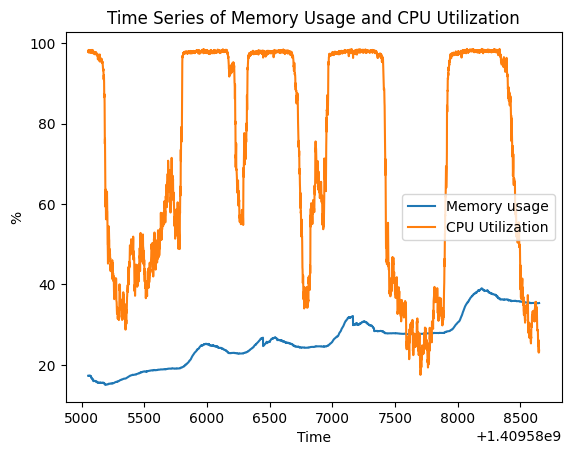

In [63]:
# Creation of the figure
fig,ax = plt.subplots()

# Creation of the two different time series
ax.plot(df['TimeStamp'], df["%%memused"], label="Memory usage")
ax.plot(df['TimeStamp'], df["all_%%usr"], label="CPU Utilization")

ax.set_xlabel('Time')
ax.set_ylabel('%')
ax.set_title('Time Series of Memory Usage and CPU Utilization')
ax.legend()

# Show the plot
plt.show()

(b) Box plots of memory usage (“%%memused”) and of CPU utilization (“all %%usr”).

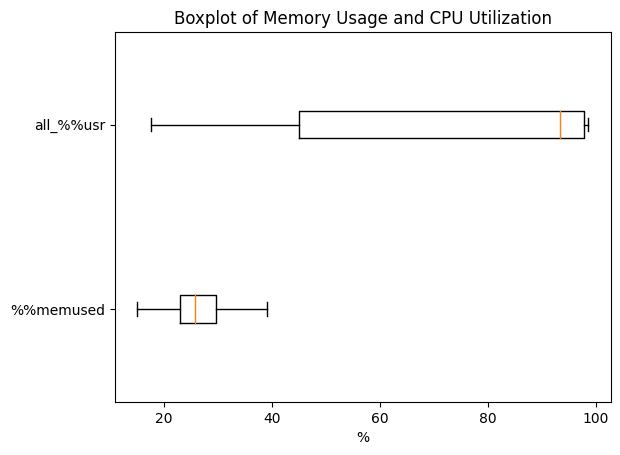

In [64]:
# Creation of the figure
fig, ax = plt.subplots()

# Creation of the boxplot
ax.boxplot([df["%%memused"], df["all_%%usr"]], vert=False)

ax.set_yticklabels(["%%memused", "all_%%usr"])
ax.set_xlabel('%')
ax.set_title('Boxplot of Memory Usage and CPU Utilization')

# Show the plot
plt.show()

(c) Density plots of memory usage (“%%memused”) and of CPU utilization (“all %%usr”).

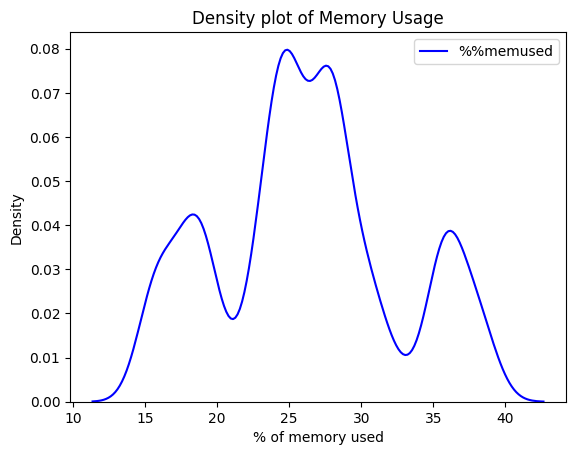

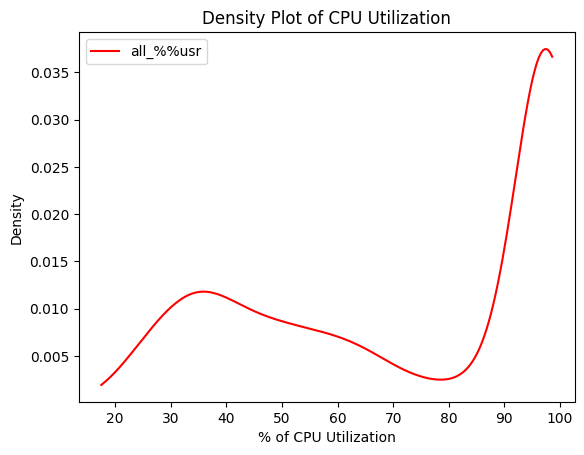

In [65]:
# Creation of the figure n°1
plt.figure(1) 

# Creation of the density plot n°1
sns.kdeplot(data=df["%%memused"], label="%%memused",color ='b')


plt.xlabel('% of memory used')
plt.ylabel('Density')
plt.legend()
plt.title('Density plot of Memory Usage')

# Creation of the figure n°2
plt.figure(2) 

# Creation of the density plot n°1
sns.kdeplot(data=df["all_%%usr"],label="all_%%usr", color ='r', cut = 0, clip =(0,100))

plt.xlabel('% of CPU Utilization')
plt.ylabel('Density')
plt.legend()
plt.title('Density Plot of CPU Utilization')


# Show the plot
plt.show()

(d) Histograms of memory usage (“%%memused”) with bin size 1% and of CPU utilization (“all %%usr”) with bin size 5%

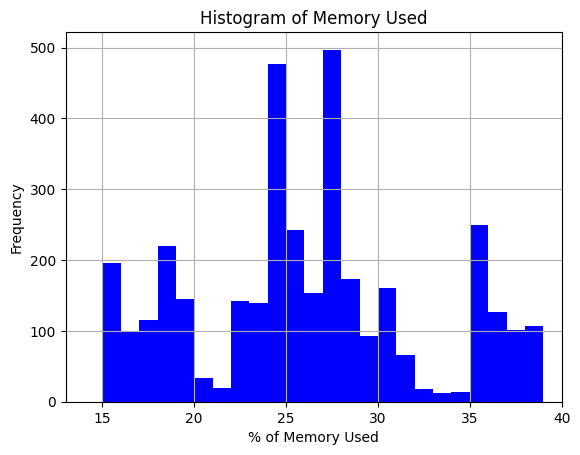

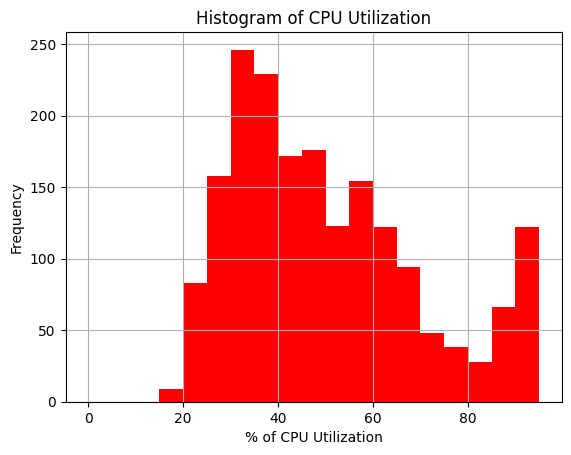

In [66]:
plt.figure(1)

# Creation of the first histogram
plt.hist(df["%%memused"], bins=range(0, 100, 1),color='b')
plt.xlim((13,40))
plt.xlabel('% of Memory Used')
plt.ylabel('Frequency')
plt.title(f'Histogram of Memory Used')
plt.grid()

plt.figure(2) 

# Creation of the second histogram
plt.hist(df["all_%%usr"], bins=range(0,100,5), color='r')

plt.xlabel('% of CPU Utilization')
plt.ylabel('Frequency')
plt.title(f'Histogram of CPU Utilization')
plt.grid()

# Show the plots
plt.show()

### Quizz n°1 

*Assume we want to predict a certain service metric from network measurements using linear regression. Under which condition do we expect the linear regression model to give predictions with high accuracy, and under which condition do we expect low prediction accuracy?*

When we are using linear regression, we need the data to be linearly distributed. If it is not the case, we are going to have a pretty low accuracy and a high error. Else, the prediction error is minimized, thus the accuracy is maximized.

## Task 2 - Estimating Service Metrics from Device Statistics using Linear Regression

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### 2.1 Evaluate the Accuracy of Service Metric Estimation

1. Model Training

In [68]:
# Creation of the different matrix. The feature matrix X and the service metrics matrix Y.
X = df.drop('Y',axis = 1)
Y = df['Y']

# Use of validation-set technique to split the set of observations into a train set and a test set.
X_train, X_test, Y_train, Y_test, t_train, t_test = train_test_split(X,Y,df['TimeStamp'], train_size = 0.7)

# Linear Model training with the training set.
model = LinearRegression()
model.fit(X_train,Y_train)

# Linear Model coefficients
model.coef_
coefs = pd.DataFrame(model.coef_, columns=['Coef'])
coefs = coefs.applymap(round_3)
print(coefs)

         Coef
0   -0.000923
1     -0.0229
2      0.0939
3     0.00886
4   -0.000195
5        0.13
6     -0.0195
7     0.00495
8   -1.75e-05
9    -0.00606
10    0.00269
11   -3.6e-05
12   -0.00254


2. Accuracy of the model M

In [69]:
predictions_linear = model.predict(X_test)
predictions_naive = np.mean(Y_train)

NMAE_linear = np.mean(np.abs(Y_test - predictions_linear))/np.mean(Y_test)
print("NMAE on the Linear Model = {} %\n ".format(NMAE_linear*100))

NMAE_naive = np.mean(np.abs(Y_test - predictions_naive))/np.mean(Y_test)
print("NMAE on the Naive Model = {} %\n ".format(NMAE_naive*100))

NMAE on the Linear Model = 9.554140319057195 %
 
NMAE on the Naive Model = 22.915387385892075 %
 


3. Time series plot of the measurements and the model estimations for M for the Video Frame Rate values in the test set.

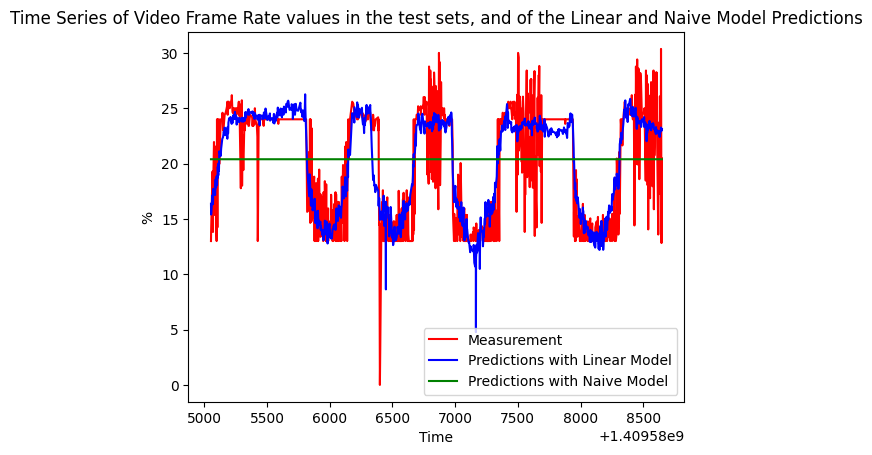

In [70]:
# Transform the timestamp and output vectors in numpy arrays
t_test = np.array(t_test)
Y_test = np.array(Y_test)

# The train/test sets are randomly selected, so they are not sorted anymore. We sort them like in the same order as the time stamps.
sorted_idx = np.argsort(t_test)
sorted_t_test = np.sort(t_test)
sorted_Y_test = Y_test[sorted_idx]
sorted_predictions_linear = predictions_linear[sorted_idx]
sorted_predictions_naive = np.ones(len(Y_test)) * predictions_naive

fig,ax = plt.subplots()

ax.plot(sorted_t_test, sorted_Y_test,label = 'Measurement', color ='r')
ax.plot(sorted_t_test, sorted_predictions_linear,label = 'Predictions with Linear Model', color = 'b')
ax.plot(sorted_t_test, sorted_predictions_naive,label = 'Predictions with Naive Model', color = 'g')

ax.set_xlabel('Time')
ax.set_ylabel('%')
ax.set_title('Time Series of Video Frame Rate values in the test sets, and of the Linear and Naive Model Predictions')
ax.legend()

# Show the plot
plt.show()

4. Produce a density plot and a histogram for the Video Frame Rate values in the test set. Set the bin size of the histogram to 1 frame/second.

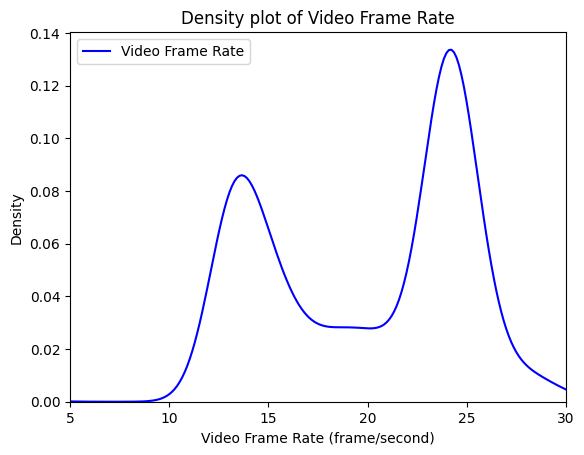

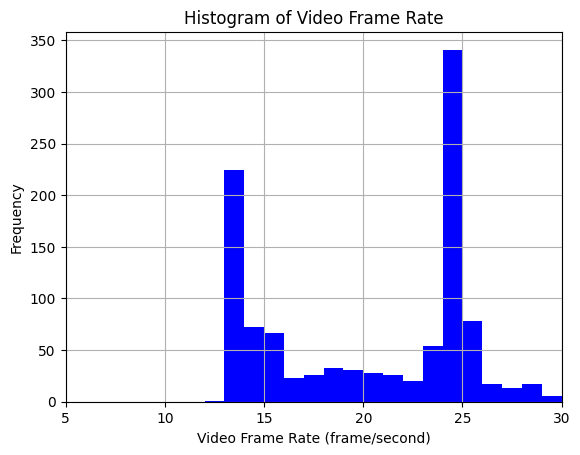

In [75]:
plt.figure(1)

# Creation of the density plot
ax = sns.kdeplot(data=Y_test, label="Video Frame Rate",color ='b',cut = 0 ,clip=(5,30))
ax.set_xlim(5,30)

plt.xlabel('Video Frame Rate (frame/second)')
plt.ylabel('Density')
plt.legend()
plt.title('Density plot of Video Frame Rate')

plt.figure(2)

# Creation of the histogram
plt.hist(Y_test, bins=range(int(min(Y_test))-1, int(max(Y_test))+1, 1),color='b')

plt.xlabel('Video Frame Rate (frame/second)')
plt.xlim((5,30))
plt.ylabel('Frequency')
plt.title(f'Histogram of Video Frame Rate')
plt.grid()

# Show the plots
plt.show()

5. Produce a density plot of the estimation errors $y_i − \hat{y}_i$ on the test set.

Text(0.5, 1.0, 'Density plot of Error on Video Frame Rate Estimation')

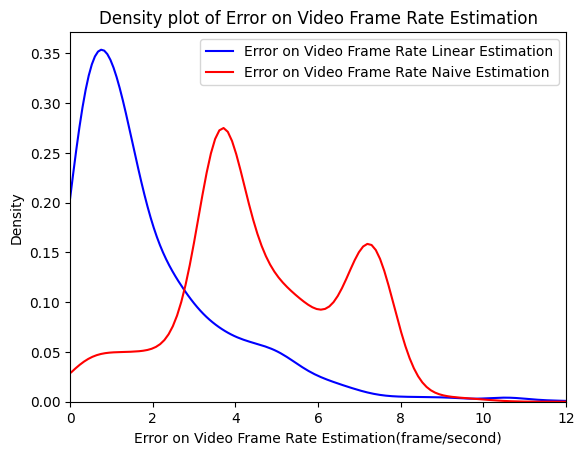

In [74]:
error_linear = np.abs(Y_test - predictions_linear)
error_naive = np.abs(Y_test - predictions_naive)

plt.figure()

# Creation of the density plot
sns.kdeplot(data=error_linear, label="Error on Video Frame Rate Linear Estimation",color ='b',cut = 0)
sns.kdeplot(data=error_naive, label="Error on Video Frame Rate Naive Estimation",color ='r',cut = 0)

plt.xlabel('Error on Video Frame Rate Estimation(frame/second)')
plt.xlim((0,12))
plt.ylabel('Density')
plt.legend()
plt.title('Density plot of Error on Video Frame Rate Estimation')